In [13]:
%matplotlib notebook
import numpy as np
import helpers
import pandas as pd
import matplotlib as mpl

mpl.rcParams['figure.max_open_warning'] = 30

# load container for plotting
evoked = helpers.load_evoked_container(hfreq=100, window=[0, 0.9])

Reading data/meg_final_data/evoked_hfreq100.0_sfreq100.0_window0.00-0.90_mag-ave.fif ...
    Read a total of 6 projection items:
        grad_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
    Found the data of interest:
        t =       0.00 ...     890.00 ms (Unknown)
        0 CTF compensation matrices available
        nave = 480 - aspect type = 100
No baseline correction applied


In [2]:
# plotting function
times=np.linspace(0.4, 0.7, 8)
def plot_topo(data, times=np.linspace(0.4, 0.7, 8), scale=1, 
              vmin=None, vmax=None, cmap=None, unit=None):
    
    for reg in data.columns:
        evoked.data = data[reg].values.reshape(evoked.data.shape)
        evoked.comment = reg
    
        fig = evoked.plot_topomap(times, scale=scale, vmin=vmin, vmax=vmax, 
                                  cmap=cmap, unit=unit, image_interp='nearest', 
                                  title=reg)
        fig.set_label(reg)

# ADVI

In [3]:
second_level_advi = pd.read_hdf(helpers.resultsdir + '/meg_hierarchical_advi.h5', 'second_level')

In [4]:
second_level_advi.xs('mlog10p', axis=1, level='measure').describe()

regressor        dot_y      entropy    intercept  logpost_left     surprise  \
count      3162.000000  3162.000000  3162.000000   3162.000000  3162.000000   
mean          1.031662     1.240718     1.212909      1.334819     0.862730   
std           0.895671     1.153511     1.022169      1.437122     0.645480   
min           0.301546     0.301105     0.301081      0.301059     0.301177   
25%           0.483231     0.517036     0.513174      0.504915     0.434361   
50%           0.727711     0.868203     0.863078      0.830091     0.636205   
75%           1.246646     1.494693     1.544428      1.522857     1.060137   
max           7.845886     9.312353     8.666034     13.644960     5.429320   

regressor   trial_time  
count      3162.000000  
mean          0.762345  
std           0.432218  
min           0.301062  
25%           0.443646  
50%           0.636716  
75%           0.954283  
max           2.963461

## 'posterior t-values'

<IPython.core.display.Javascript object>


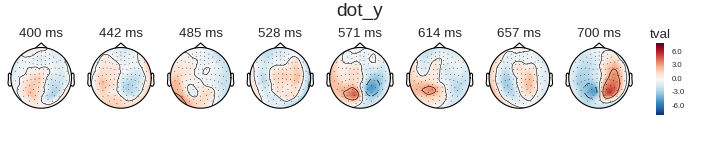

<IPython.core.display.Javascript object>


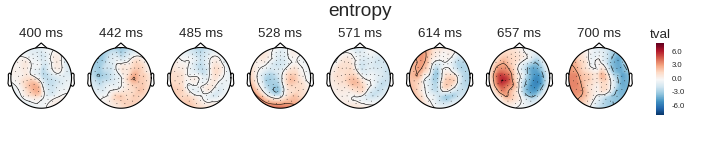

<IPython.core.display.Javascript object>


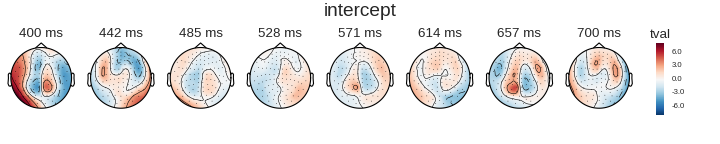

<IPython.core.display.Javascript object>


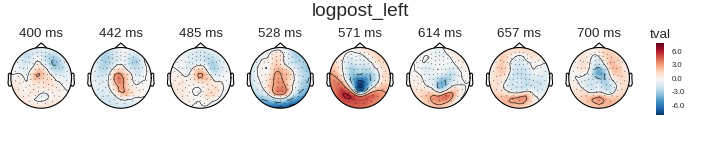

<IPython.core.display.Javascript object>


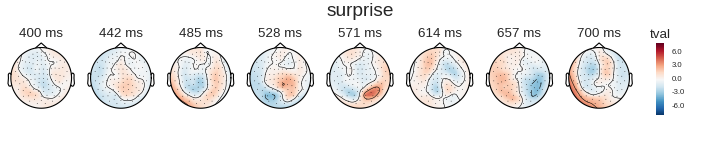

<IPython.core.display.Javascript object>


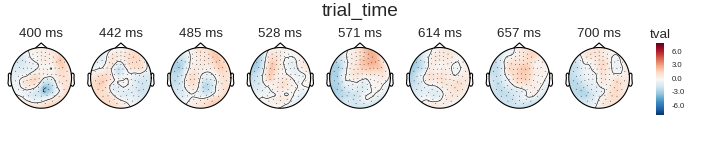

In [5]:
data = (second_level_advi.xs('mean', axis=1, level='measure')  / 
        second_level_advi.xs('std', axis=1, level='measure'))

plot_topo(data, times, vmin=-8, vmax=8, unit='tval')

# Summary statistic approach

In [3]:
second_level = pd.read_hdf(helpers.resultsdir + '/meg_hierarchical_ss_bl_long.h5', 'second_level')

In [4]:
second_level.xs('mlog10p', axis=1, level='measure').describe()

regressor        dot_y      entropy    intercept  logpost_left     surprise  \
count      9180.000000  9180.000000  9180.000000   9180.000000  9180.000000   
mean          0.754884     0.658203     0.836299      1.665693     0.674317   
std           0.850497     0.709678     0.904796      1.957386     0.737985   
min           0.000143     0.000033     0.000041      0.000385     0.000011   
25%           0.181648     0.165300     0.208200      0.289814     0.172067   
50%           0.455023     0.418851     0.534939      0.882882     0.438057   
75%           1.014106     0.894902     1.150303      2.372504     0.907303   
max           7.669115     6.549847     6.753014     12.447437     6.018793   

regressor   trial_time  
count      9180.000000  
mean          0.448558  
std           0.443674  
min           0.000045  
25%           0.124078  
50%           0.304841  
75%           0.630191  
max           3.089399

## t-values
Note that these are not exactly the t-values underlying the negative log10 p-values stored in second_level, because scipy.stats uses a different denominator when computing variances and standard deviations than the default used by numpy (N-1 in scipy.stats vs. N in numpy default).

<IPython.core.display.Javascript object>


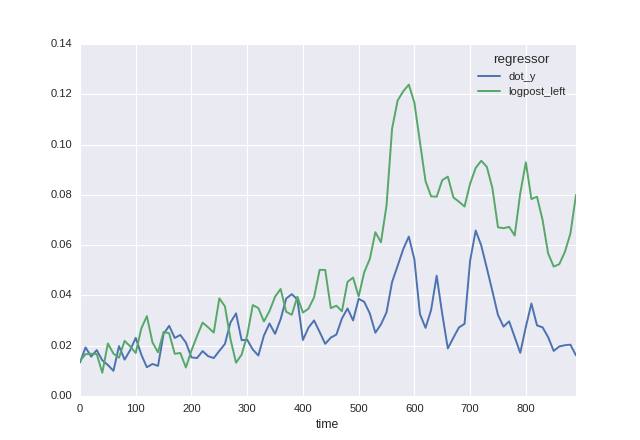

In [39]:
second_level.xs('mean', axis=1, level='measure').max(level='time').plot(
    y=['dot_y', 'logpost_left'])

<IPython.core.display.Javascript object>


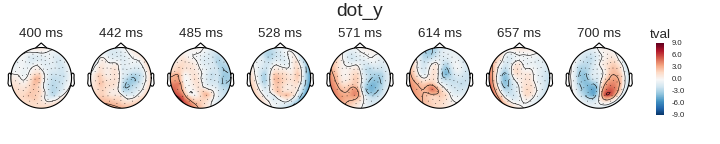

<IPython.core.display.Javascript object>


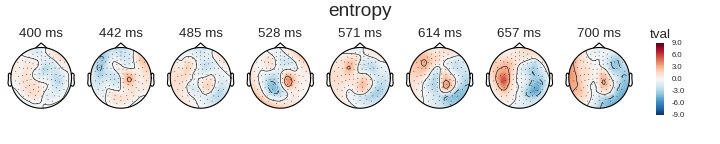

<IPython.core.display.Javascript object>


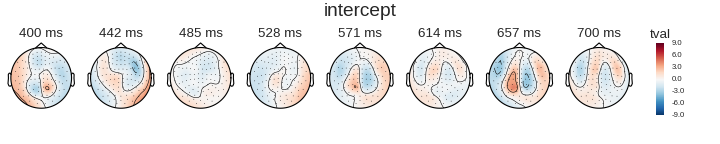

<IPython.core.display.Javascript object>


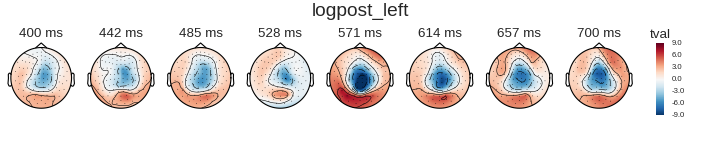

<IPython.core.display.Javascript object>


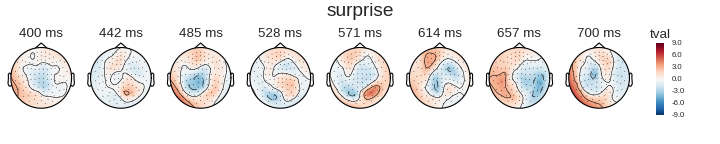

<IPython.core.display.Javascript object>


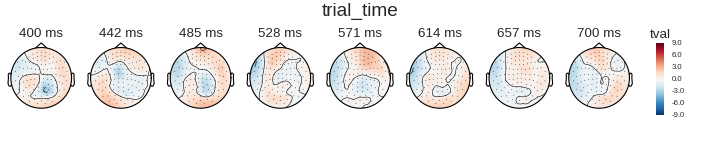

In [14]:
data = (second_level.xs('mean', axis=1, level='measure')  / 
        second_level.xs('std', axis=1, level='measure') * np.sqrt(34))

plot_topo(data, times, vmin=-9, vmax=9, unit='tval')

## Estimated mean parameter values

<IPython.core.display.Javascript object>


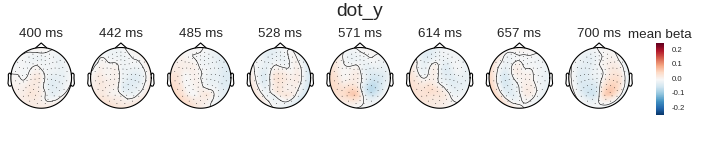

<IPython.core.display.Javascript object>


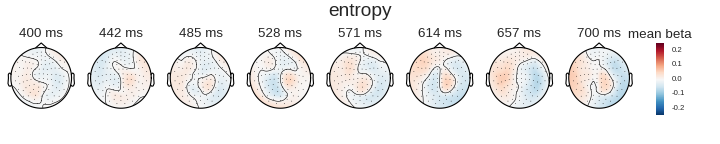

<IPython.core.display.Javascript object>


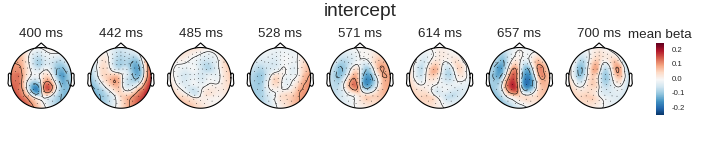

<IPython.core.display.Javascript object>


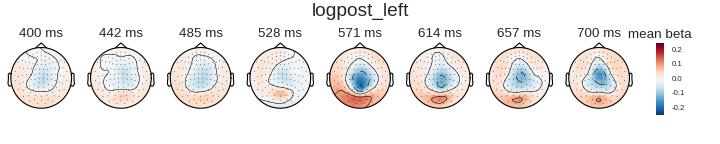

<IPython.core.display.Javascript object>


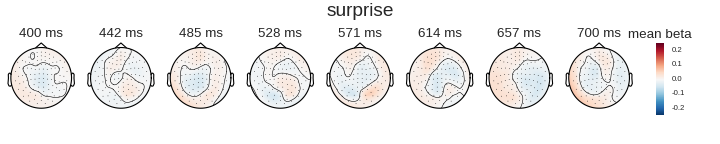

<IPython.core.display.Javascript object>


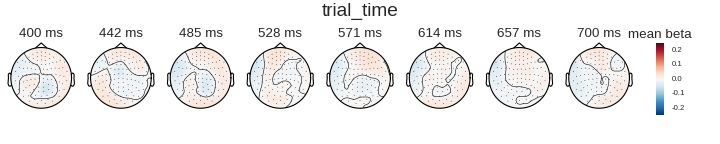

In [15]:
plot_topo(second_level.xs('mean', axis=1, level='measure'), 
          times, vmin=-0.2, vmax=0.2, unit='mean beta')

## Between-subject standard deviation

<IPython.core.display.Javascript object>


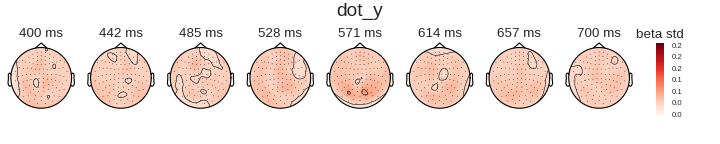

<IPython.core.display.Javascript object>


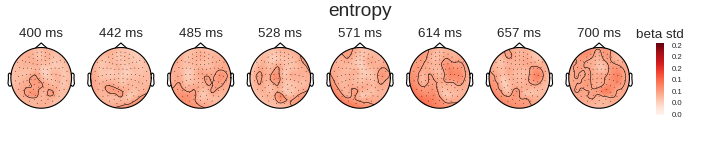

<IPython.core.display.Javascript object>


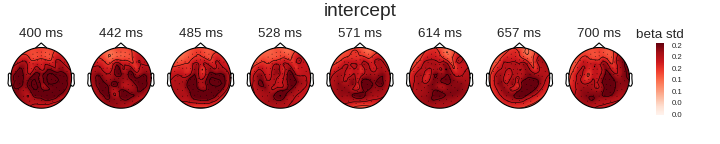

<IPython.core.display.Javascript object>


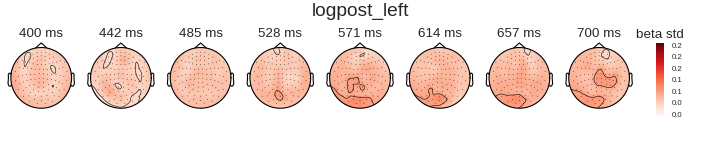

<IPython.core.display.Javascript object>


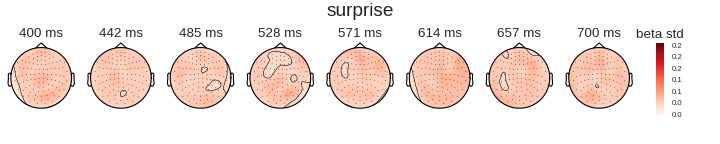

<IPython.core.display.Javascript object>


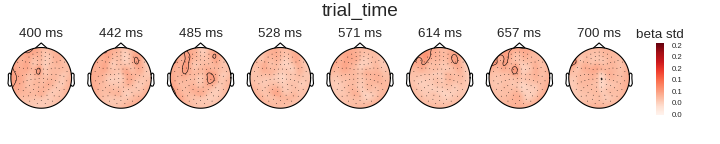

In [16]:
plot_topo(second_level.xs('std', axis=1, level='measure'), 
          times, vmin=0, vmax=0.25, unit='beta std')

# Permuted summary statistic approach

In [34]:
second_level_perm = pd.read_hdf(helpers.resultsdir + 
                                '/meg_hierarchical_ss_bl_long_permuted.h5', 'second_level')
second_level_perm2 = pd.read_hdf(helpers.resultsdir + 
                                '/meg_hierarchical_ss_bl_long_permuted2.h5', 'second_level')

In [35]:
second_level_perm.xs('mlog10p', axis=1, level='measure').describe()

regressor        dot_y      entropy    intercept  logpost_left     surprise  \
count      9180.000000  9180.000000  9180.000000   9180.000000  9180.000000   
mean          0.489674     0.490196     0.812738      0.490669     0.493981   
std           0.508683     0.476508     0.887913      0.496796     0.494368   
min           0.000060     0.000069     0.000134      0.000021     0.000002   
25%           0.138887     0.143357     0.190571      0.138350     0.139612   
50%           0.321083     0.344904     0.506128      0.337503     0.338362   
75%           0.669109     0.687933     1.126425      0.681979     0.682828   
max           5.270975     4.055145     7.525979      3.796593     3.962595   

regressor   trial_time  
count      9180.000000  
mean          0.415282  
std           0.399470  
min           0.000015  
25%           0.121066  
50%           0.295209  
75%           0.589661  
max           3.633850

## time-courses of maximum log10p-values

<IPython.core.display.Javascript object>


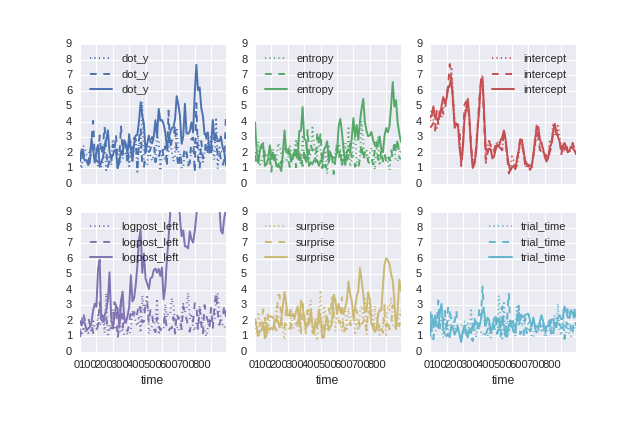

In [36]:
# trials permuted
ax = second_level_perm.xs('mlog10p', axis=1, level='measure').max(level='time').plot(
    subplots=True, layout=[2, 3], style=[':']*6, ylim=[0, 9])
# trials permuted2
second_level_perm2.xs('mlog10p', axis=1, level='measure').max(level='time').plot(
    ax=ax, subplots=True, style=['--']*6, ylim=[0, 9]);
# trials not permuted
second_level.xs('mlog10p', axis=1, level='measure').max(level='time').plot(
    ax=ax, subplots=True, ylim=[0, 9]);

## t-values

<IPython.core.display.Javascript object>


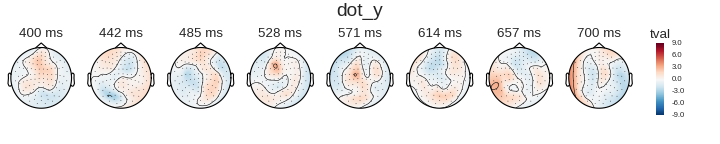

<IPython.core.display.Javascript object>


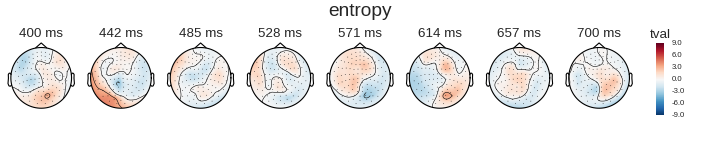

<IPython.core.display.Javascript object>


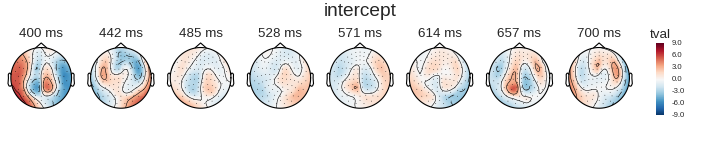

<IPython.core.display.Javascript object>


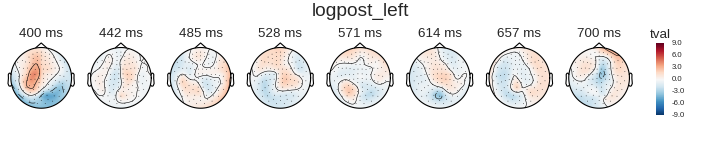

/home/bitzer/programs/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 30 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


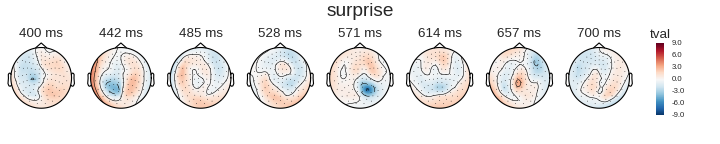

<IPython.core.display.Javascript object>


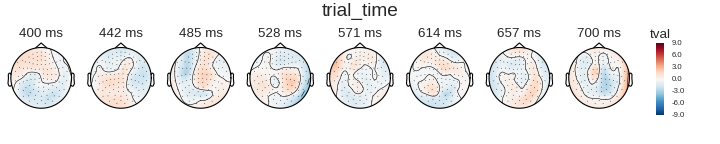

In [15]:
data = (second_level_perm.xs('mean', axis=1, level='measure')  / 
        second_level_perm.xs('std', axis=1, level='measure') * np.sqrt(34))

plot_topo(data, times, vmin=-9, vmax=9, unit='tval')

# 4th-dot regressors

In [41]:
second_level_4th = pd.read_hdf(helpers.resultsdir + '/meg_hierarchical_ss_bl_long_4th.h5', 'second_level')

In [42]:
second_level_4th.xs('mlog10p', axis=1, level='measure').describe()

regressor        dot_y      entropy    intercept  logpost_left     surprise  \
count      9180.000000  9180.000000  9180.000000   9180.000000  9180.000000   
mean          0.829776     0.639804     0.822399      1.865301     0.609354   
std           1.088664     0.676710     0.874156      2.047053     0.704906   
min           0.000012     0.000068     0.000022      0.000110     0.000097   
25%           0.169558     0.164390     0.212350      0.367068     0.154982   
50%           0.447096     0.408581     0.525210      1.071512     0.390752   
75%           0.999469     0.898372     1.142273      2.666753     0.803186   
max           7.930555     5.584213     7.161048     11.839856     7.460654   

regressor   trial_time  
count      9180.000000  
mean          0.448127  
std           0.438212  
min           0.000003  
25%           0.127422  
50%           0.303945  
75%           0.626719  
max           3.634236

## t-values

/home/bitzer/programs/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 30 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


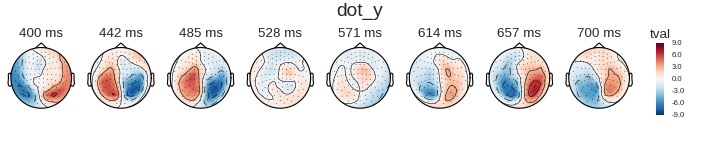

<IPython.core.display.Javascript object>


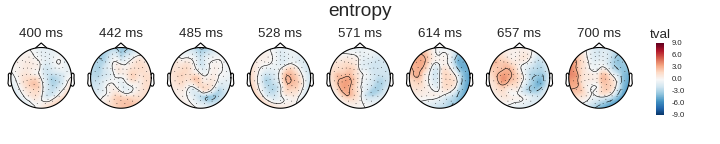

<IPython.core.display.Javascript object>


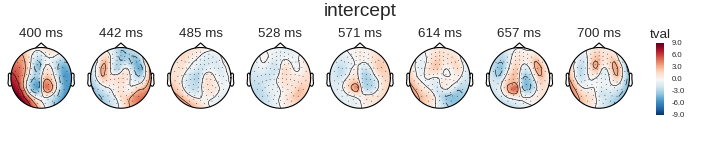

<IPython.core.display.Javascript object>


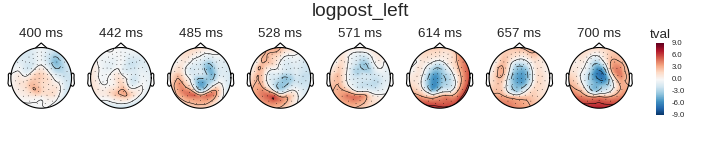

<IPython.core.display.Javascript object>


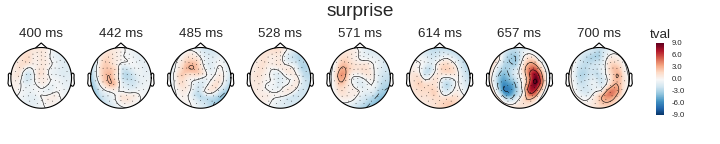

<IPython.core.display.Javascript object>


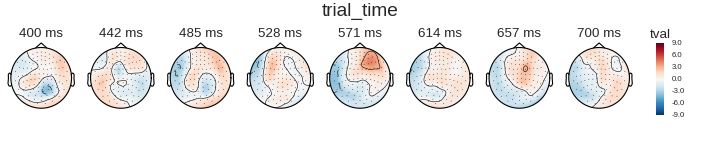

In [18]:
data = (second_level_4th.xs('mean', axis=1, level='measure')  / 
        second_level_4th.xs('std', axis=1, level='measure') * np.sqrt(34))

plot_topo(data, times, vmin=-9, vmax=9, unit='tval')

## comparison to 5th-dot regressors

<IPython.core.display.Javascript object>


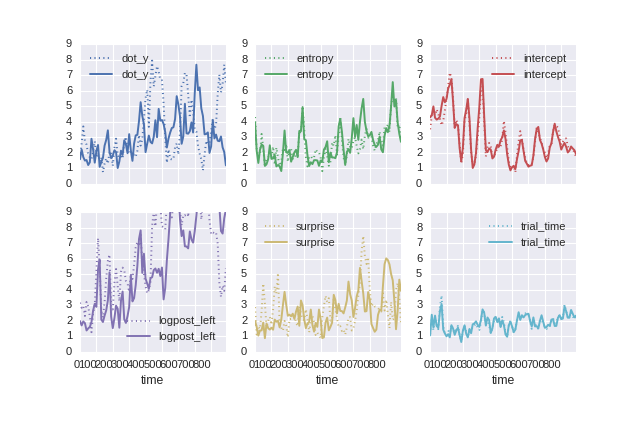

In [43]:
# 4th-dot related regressors
ax = second_level_4th.xs('mlog10p', axis=1, level='measure').max(level='time').plot(
    subplots=True, layout=[2, 3], style=[':']*6, ylim=[0, 9])
# 5th-dot related regressors
second_level.xs('mlog10p', axis=1, level='measure').max(level='time').plot(
    ax=ax, subplots=True, ylim=[0, 9]);

In [20]:
second_level_nosm = pd.read_hdf(helpers.resultsdir + '/meg_hierarchical_ss_nosmooth.h5', 'second_level')

In [21]:
second_level_nosm.xs('mlog10p', axis=1, level='measure').describe()

regressor        dot_y      entropy    intercept  logpost_left     surprise  \
count      3162.000000  3162.000000  3162.000000   3162.000000  3162.000000   
mean          0.868871     0.837482     0.855453      1.069000     0.681596   
std           0.947373     0.921059     0.887544      1.248218     0.730685   
min           0.000335     0.000173     0.000163      0.000171     0.000117   
25%           0.220955     0.206314     0.208310      0.231099     0.172356   
50%           0.560212     0.538326     0.561927      0.617892     0.421420   
75%           1.162766     1.142329     1.195846      1.415046     0.934594   
max           6.540787     8.911061     5.703322      9.508207     5.371667   

regressor   trial_time  
count      3162.000000  
mean          0.567842  
std           0.539595  
min           0.000030  
25%           0.170207  
50%           0.391902  
75%           0.801413  
max           3.322424

## Smoothing vs. no smoothing

/home/bitzer/programs/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 30 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


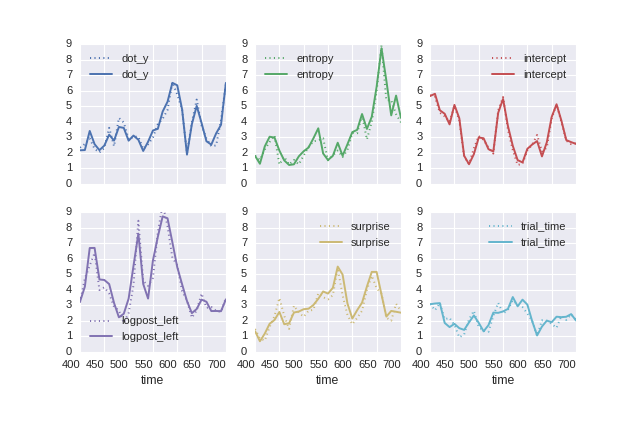

In [22]:
# unsmoothed data
ax = second_level_nosm.xs('mlog10p', axis=1, level='measure').max(level='time').plot(
    subplots=True, layout=[2, 3], style=[':']*6, ylim=[0, 9])
# smoothed data
second_level.xs('mlog10p', axis=1, level='measure').max(level='time').plot(
    ax=ax, subplots=True, ylim=[0, 9]);